In [1]:
import os

import numpy as np

from scipy import ndimage

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

import astropy.time as t
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, SqrtStretch

from photutils.centroids import centroid_com as cen

from sunpy.net.helioviewer import HelioviewerClient
import sunpy.map
from sunpy.map import Map
from sunpy.map import MapSequence
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.net import helioviewer
from sunpy.visualization.animator import MapSequenceAnimator

import sunkit_image.coalignment as coal

import imageio

In [2]:
a.Instrument

<class 'sunpy.net.attrs.Instrument'>
sunpy.net.attrs.Instrument

Specifies the Instrument name for the search.

       Attribute Name       ...
--------------------------- ...
aia                         ...
bcs                         ...
be_continuum                ...
be_halpha                   ...
bigbear                     ...
caii                        ...
cds                         ...
celias                      ...
cerrotololo                 ...
chp                         ...
chrotel                     ...
climso                      ...
cook                        ...
costep                      ...
cp                          ...
dpm                         ...
eis                         ...
eit                         ...
elteide                     ...
erne                        ...
eui                         ...
eve                         ...
eve                         ...
film                        ...
five_12_channelmagnetograph ...
foxsi                       ...
gbm                         ...
goes                        ...
golf                        ...
gong                        ...
ha2                         ...
hi_c                        ...
hi_c21                      ...
hmi                         ...
hxeclipse                   ...
hxt                         ...
imax                        ...
impact                      ...
iris                        ...
isoon                       ...
iss                         ...
ivm                         ...
k_cor                       ...
kpdc                        ...
lasco                       ...
learmonth                   ...
longwave_lobe_06            ...
longwave_lobe_07            ...
longwave_slit_06            ...
longwave_slit_07            ...
lyra                        ...
maunaloa                    ...
mdi                         ...
mees                        ...
mergedgong                  ...
meudonspectroheliograph     ...
mk4                         ...
noaa_indices                ...
noaa_predict                ...
norh                        ...
phoenix                     ...
phoka                       ...
plastic                     ...
ptmc                        ...
rhessi                      ...
rhessi                      ...
secchi                      ...
shortwave_lobe_06           ...
shortwave_lobe_07           ...
shortwave_slit_06           ...
shortwave_slit_07           ...
six_0_ftshg                 ...
sj                          ...
solarftsspectrometer        ...
soon                        ...
sot                         ...
sp1                         ...
sp2                         ...
spectroheliograph           ...
spectromagnetograph         ...
srs_table                   ...
sufi                        ...
sumer                       ...
suvi                        ...
suvi                        ...
swan                        ...
swap                        ...
swaves                      ...
sxt                         ...
tm_1001                     ...
tm_1010                     ...
trace                       ...
udaipur                     ...
uvcs                        ...
vault_1999                  ...
vault_2002                  ...
vault_2014                  ...
virgo                       ...
vsm                         ...
wbs                         ...
wispr                       ...
x123                        ...
xrs                         ...

In [3]:
a.Time('2012/5/1', '2012/5/31')

<sunpy.net.attrs.Time(2012-05-01 00:00:00.000, 2012-05-31 00:00:00.000)>

In [4]:
# result = Fido.search(a.Time('2012/5/1', '2012/5/1T00:01:00'), a.Instrument.hmi, a.Physobs('intensity')) 
# result

In [5]:
hv = helioviewer.HelioviewerClient()  
for sourceid, obs in hv.data_sources.items():
    print(f"{sourceid}: {obs}")

('SOHO', 'EIT', None, '171'): 0
('SOHO', 'EIT', None, '195'): 1
('SOHO', 'EIT', None, '284'): 2
('SOHO', 'EIT', None, '304'): 3
('SOHO', 'LASCO', 'C2', 'white-light'): 4
('SOHO', 'LASCO', 'C3', 'white-light'): 5
('SOHO', 'MDI', None, 'magnetogram'): 6
('SOHO', 'MDI', None, 'continuum'): 7
('SDO', 'AIA', None, '94'): 8
('SDO', 'AIA', None, '131'): 9
('SDO', 'AIA', None, '171'): 10
('SDO', 'AIA', None, '193'): 11
('SDO', 'AIA', None, '211'): 12
('SDO', 'AIA', None, '304'): 13
('SDO', 'AIA', None, '335'): 14
('SDO', 'AIA', None, '1600'): 15
('SDO', 'AIA', None, '1700'): 16
('SDO', 'AIA', None, '4500'): 17
('SDO', 'HMI', None, 'continuum'): 18
('SDO', 'HMI', None, 'magnetogram'): 19
('STEREO_A', 'SECCHI', 'EUVI', '171'): 20
('STEREO_A', 'SECCHI', 'EUVI', '195'): 21
('STEREO_A', 'SECCHI', 'EUVI', '284'): 22
('STEREO_A', 'SECCHI', 'EUVI', '304'): 23
('STEREO_B', 'SECCHI', 'EUVI', '171'): 24
('STEREO_B', 'SECCHI', 'EUVI', '195'): 25
('STEREO_B', 'SECCHI', 'EUVI', '284'): 26
('STEREO_B', 'SECC

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

<sunpy.map.sources.sdo.HMIMap object at 0x7fe250f805e0>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 HMI FRONT2
Detector:		 HMI
Measurement:		 continuum
Wavelength:		 6173.0
Observation Date:	 2014-02-01 23:59:40
Exposure Time:		 Unknown
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.6 0.6] arcsec / pix
Reference Pixel:	 [2047.5 2047.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
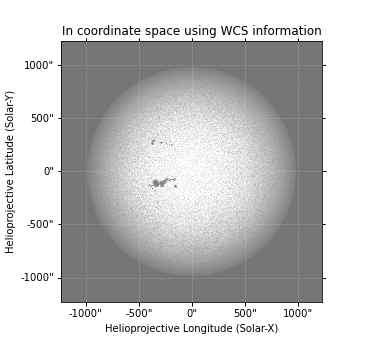
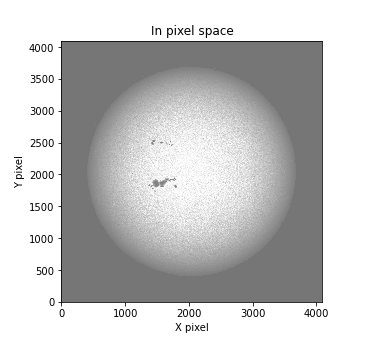
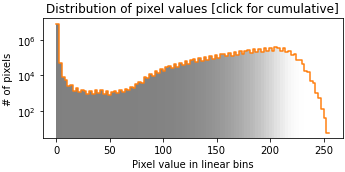
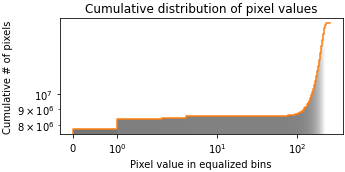

In [6]:
test_file = hv.download_jp2('2014-02-02', source_id=18)
test_map = Map(test_file)
test_map

In [7]:
test_map.reference_pixel

PixelPair(x=<Quantity 2047.5 pix>, y=<Quantity 2047.5 pix>)

In [8]:
ref = test_map.wcs.wcs_world2pix(0, 0, 0)
ref

[array(2047.5), array(2047.5)]

In [9]:
cof = cen(test_map.data)
cof

array([2048.08981286, 2047.88801973])

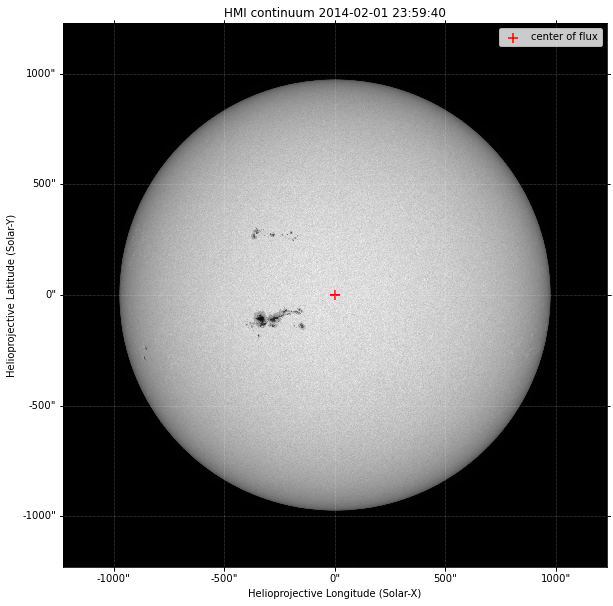

In [10]:
plt.figure(figsize=(10,10))
test_map.plot()
# plt.scatter(ref[0], ref[1], s = 100,  color = 'blue', marker = '+', label = 'reference pixel')
plt.scatter(cof[0], cof[1], s = 100, color = 'red', marker = '+', label = 'center of flux')
plt.legend()

In [11]:
def plotCentroid(sun_map, show_plot = True, save_fig = False):
    """
    Plots the image of a file and marks the 'center of flux' in the image.
    
    file: jp2 image
        The image fetched by HelioviewerClient.
        
    Returns: the 'center of flux' coordinate.
    """
    map_array = sun_map.data
    com = cen(map_array)
    ref = sun_map.reference_pixel
    delta = (com[0] - ref.x.value, com[1] - ref.y.value)
    
    plt.figure(figsize = (10, 10))
    sun_map.plot()
    plt.scatter(com[0], com[1], s = 300, color = 'r', marker = '+')
#     plt.scatter(ref[0], ref[1], s = 300, color = 'b', marker = 'x')
    plt.title(sun_map.date)
    
    file_name = f'/Users/waritwij/Documents/GitHub/astro_jitter/maps/{sun_map.date.value[:10]}.png'
    
    if save_fig:
        plt.savefig(file_name, format = 'png')
 
    if show_plot:
        plt.show()
    else:
        print('plotted')
    
    return file_name, delta

In [12]:
# plotCentroid(test_map)

In [13]:
# feb1_file = hv.download_jp2('2014/05/31', source_id=18)
# feb1_map = Map(feb1_file)
# ref1 = feb1_map.wcs.wcs_world2pix(0, 0, 0)
# cof1 = cen(feb1_map.data)
# plt.figure(figsize=(15,15))
# feb1_map.plot()
# feb1_map.draw_limb()
# plt.scatter(ref1[0], ref1[1], s = 100,  color = 'blue', marker = '+', label = 'reference pixel')
# plt.scatter(cof1[0], cof1[1], s = 100, color = 'red', marker = '+', label = 'center of flux')
# plt.legend()

# print(feb1_map.rsun_obs)
# print(feb1_map.scale[0].value)
# print(feb1_map.rsun_obs.value/feb1_map.scale[0].value, 'pixel')

In [14]:
# feb28_file = hv.download_jp2('2014/02/28', source_id=18)
# feb28_map = Map(feb28_file)
# ref28 = feb28_map.wcs.wcs_world2pix(0, 0, 0)
# cof28 = cen(feb28_map.data)
# plt.figure(figsize=(15,15))
# feb28_map.plot()
# feb28_map.draw_limb()
# plt.scatter(ref28[0], ref28[1], s = 100,  color = 'blue', marker = '+', label = 'reference pixel')
# plt.scatter(cof28[0], cof28[1], s = 100, color = 'red', marker = '+', label = 'center of flux')
# plt.legend()

# print(feb28_map.rsun_obs)
# print(feb28_map.scale)

In [15]:
time = t.Time('2015-07-01')
time_end = t.Time('2022-07-27')
timerange = time_end - time
dt = t.TimeDelta(1, format = 'jd')

xcens = np.zeros(int(timerange.value))
ycens = np.zeros(int(timerange.value))
xrefs = np.zeros(int(timerange.value))
yrefs = np.zeros(int(timerange.value))
rsuns = np.zeros(int(timerange.value))
#dates = np.zeros(int(timerange.value))

filenames = []
times = []
i = 0

while time <= time_end:
    
    try:
        time_image = hv.get_closest_image(time, source_id = 18)['date']
    
    except:
        time += dt
        continue
        
    if time_image in times:
            xrefs[i] = None
            yrefs[i] = None
            xcens[i] = None
            ycens[i] = None
            rsuns[i] = None

    else:
        print(time)
        file = hv.download_jp2(time_image, source_id = 18, progress = False)

        sun_map = Map(file)

        rsuns[i] = sun_map.rsun_obs.value/sun_map.scale[0].value

        ref = sun_map.wcs.wcs_world2pix(0, 0, 0)
        xrefs[i] = sun_map.wcs.wcs_world2pix(0, 0, 0)[0]
        yrefs[i] = sun_map.wcs.wcs_world2pix(0, 0, 0)[1]

        c = cen(sun_map.data)
        xcens[i] = c[0]
        ycens[i] = c[1]
        
#         plt.figure(figsize = (10, 10))
#         sun_map.plot()
#         plt.scatter(c[0], c[1], s = 400, color = 'r', marker = '+')
#     #     plt.scatter(ref[0], ref[1], s = 300, color = 'b', marker = 'x')
#         plt.title(sun_map.date)

#         file_name = f'/Users/waritwij/Documents/GitHub/astro_jitter/maps/{time.value}.png'
#         plt.savefig(file_name, format = 'png')
#         filenames.append(file_name)

#         plt.close()

    times.append(time_image)
    time += dt
    i += 1

2015-07-01 00:00:00.000
2015-07-02 00:00:00.000
2015-07-03 00:00:00.000
2015-07-04 00:00:00.000
2015-07-05 00:00:00.000
2015-07-06 00:00:00.000
2015-07-07 00:00:00.000
2015-07-08 00:00:00.000
2015-07-09 00:00:00.000
2015-07-10 00:00:00.000
2015-07-11 00:00:00.000
2015-07-12 00:00:00.000
2015-07-13 00:00:00.000
2015-07-14 00:00:00.000
2015-07-15 00:00:00.000
2015-07-16 00:00:00.000
2015-07-17 00:00:00.000
2015-07-18 00:00:00.000
2015-07-19 00:00:00.000
2015-07-20 00:00:00.000
2015-07-21 00:00:00.000
2015-07-22 00:00:00.000
2015-07-23 00:00:00.000
2015-07-24 00:00:00.000
2015-07-25 00:00:00.000
2015-07-26 00:00:00.000
2015-07-27 00:00:00.000
2015-07-28 00:00:00.000
2015-07-29 00:00:00.000
2015-07-30 00:00:00.000
2015-07-31 00:00:00.000
2015-08-01 00:00:00.000
2015-08-02 00:00:00.000
2015-08-03 00:00:00.000
2015-08-04 00:00:00.000
2015-08-05 00:00:00.000
2015-08-06 00:00:00.000
2015-08-07 00:00:00.000
2015-08-08 00:00:00.000
2015-08-09 00:00:00.000
2015-08-10 00:00:00.000
2015-08-11 00:00

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


2015-12-31 00:00:00.000
2016-01-01 00:00:00.000
2016-01-02 00:00:00.000
2016-01-03 00:00:00.000
2016-01-04 00:00:00.000
2016-01-05 00:00:00.000
2016-01-06 00:00:00.000
2016-01-07 00:00:00.000
2016-01-08 00:00:00.000
2016-01-09 00:00:00.000
2016-01-10 00:00:00.000
2016-01-11 00:00:00.000
2016-01-12 00:00:00.000
2016-01-13 00:00:00.000
2016-01-14 00:00:00.000
2016-01-15 00:00:00.000
2016-01-16 00:00:00.000
2016-01-17 00:00:00.000
2016-01-18 00:00:00.000
2016-01-19 00:00:00.000
2016-01-20 00:00:00.000
2016-01-21 00:00:00.000
2016-01-22 00:00:00.000
2016-01-23 00:00:00.000
2016-01-24 00:00:00.000
2016-01-25 00:00:00.000
2016-01-26 00:00:00.000
2016-01-27 00:00:00.000
2016-01-28 00:00:00.000
2016-01-29 00:00:00.000
2016-01-30 00:00:00.000
2016-01-31 00:00:00.000
2016-02-01 00:00:00.000
2016-02-02 00:00:00.000
2016-02-03 00:00:00.000
2016-02-04 00:00:00.000
2016-02-05 00:00:00.000
2016-02-06 00:00:00.000
2016-02-07 00:00:00.000
2016-02-08 00:00:00.000
2016-02-09 00:00:00.000
2016-02-10 00:00

2016-12-14 00:00:00.000
2016-12-15 00:00:00.000
2016-12-16 00:00:00.000
2016-12-17 00:00:00.000
2016-12-18 00:00:00.000
2016-12-19 00:00:00.000
2016-12-20 00:00:00.000
2016-12-21 00:00:00.000
2016-12-22 00:00:00.000
2016-12-23 00:00:00.000
2016-12-24 00:00:00.000
2016-12-25 00:00:00.000
2016-12-26 00:00:00.000
2016-12-27 00:00:00.000
2016-12-28 00:00:00.000
2016-12-29 00:00:00.000
2016-12-30 00:00:00.000
2016-12-31 00:00:00.000
2017-01-01 23:59:59.000
2017-01-02 23:59:59.000
2017-01-03 23:59:59.000
2017-01-04 23:59:59.000
2017-01-05 23:59:59.000
2017-01-06 23:59:59.000
2017-01-07 23:59:59.000
2017-01-08 23:59:59.000
2017-01-09 23:59:59.000
2017-01-10 23:59:59.000
2017-01-11 23:59:59.000
2017-01-12 23:59:59.000
2017-01-13 23:59:59.000
2017-01-14 23:59:59.000
2017-01-15 23:59:59.000
2017-01-16 23:59:59.000
2017-01-17 23:59:59.000
2017-01-18 23:59:59.000
2017-01-19 23:59:59.000
2017-01-20 23:59:59.000
2017-01-21 23:59:59.000
2017-01-22 23:59:59.000
2017-01-23 23:59:59.000
2017-01-24 23:59

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


2017-10-01 23:59:59.000


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


2017-10-02 23:59:59.000
2017-10-03 23:59:59.000
2017-10-04 23:59:59.000
2017-10-05 23:59:59.000
2017-10-06 23:59:59.000
2017-10-07 23:59:59.000
2017-10-08 23:59:59.000
2017-10-09 23:59:59.000
2017-10-10 23:59:59.000
2017-10-11 23:59:59.000
2017-10-12 23:59:59.000
2017-10-13 23:59:59.000
2017-10-14 23:59:59.000
2017-10-15 23:59:59.000
2017-10-16 23:59:59.000
2017-10-17 23:59:59.000
2017-10-18 23:59:59.000
2017-10-19 23:59:59.000
2017-10-20 23:59:59.000
2017-10-21 23:59:59.000
2017-10-22 23:59:59.000
2017-10-23 23:59:59.000
2017-10-24 23:59:59.000
2017-10-25 23:59:59.000
2017-10-26 23:59:59.000
2017-10-27 23:59:59.000
2017-10-28 23:59:59.000
2017-10-29 23:59:59.000
2017-10-30 23:59:59.000
2017-10-31 23:59:59.000
2017-11-01 23:59:59.000
2017-11-02 23:59:59.000
2017-11-03 23:59:59.000
2017-11-04 23:59:59.000
2017-11-05 23:59:59.000
2017-11-06 23:59:59.000
2017-11-07 23:59:59.000
2017-11-08 23:59:59.000
2017-11-09 23:59:59.000
2017-11-10 23:59:59.000
2017-11-11 23:59:59.000
2017-11-12 23:59

2018-09-12 23:59:59.000
2018-09-13 23:59:59.000
2018-09-14 23:59:59.000
2018-09-15 23:59:59.000
2018-09-16 23:59:59.000
2018-09-17 23:59:59.000
2018-09-18 23:59:59.000
2018-09-19 23:59:59.000
2018-09-20 23:59:59.000
2018-09-22 23:59:59.000
2018-09-23 23:59:59.000
2018-09-24 23:59:59.000
2018-09-25 23:59:59.000
2018-09-26 23:59:59.000
2018-09-27 23:59:59.000
2018-09-28 23:59:59.000
2018-09-29 23:59:59.000
2018-09-30 23:59:59.000
2018-10-01 23:59:59.000
2018-10-02 23:59:59.000
2018-10-03 23:59:59.000
2018-10-04 23:59:59.000
2018-10-05 23:59:59.000
2018-10-06 23:59:59.000
2018-10-07 23:59:59.000
2018-10-08 23:59:59.000
2018-10-09 23:59:59.000
2018-10-10 23:59:59.000
2018-10-11 23:59:59.000
2018-10-12 23:59:59.000
2018-10-13 23:59:59.000
2018-10-14 23:59:59.000
2018-10-15 23:59:59.000
2018-10-16 23:59:59.000
2018-10-17 23:59:59.000
2018-10-18 23:59:59.000
2018-10-19 23:59:59.000
2018-10-20 23:59:59.000
2018-10-21 23:59:59.000
2018-10-22 23:59:59.000
2018-10-23 23:59:59.000
2018-10-24 23:59

2019-08-21 23:59:59.000
2019-08-22 23:59:59.000
2019-08-23 23:59:59.000
2019-08-24 23:59:59.000
2019-08-25 23:59:59.000
2019-08-26 23:59:59.000
2019-08-27 23:59:59.000
2019-08-28 23:59:59.000
2019-08-29 23:59:59.000
2019-08-30 23:59:59.000
2019-08-31 23:59:59.000
2019-09-01 23:59:59.000
2019-09-02 23:59:59.000
2019-09-03 23:59:59.000
2019-09-04 23:59:59.000
2019-09-05 23:59:59.000
2019-09-06 23:59:59.000
2019-09-07 23:59:59.000
2019-09-08 23:59:59.000
2019-09-09 23:59:59.000
2019-09-10 23:59:59.000
2019-09-11 23:59:59.000
2019-09-12 23:59:59.000
2019-09-13 23:59:59.000
2019-09-14 23:59:59.000
2019-09-15 23:59:59.000
2019-09-16 23:59:59.000
2019-09-17 23:59:59.000
2019-09-18 23:59:59.000
2019-09-19 23:59:59.000
2019-09-20 23:59:59.000
2019-09-21 23:59:59.000
2019-09-22 23:59:59.000
2019-09-23 23:59:59.000
2019-09-24 23:59:59.000
2019-09-25 23:59:59.000
2019-09-26 23:59:59.000
2019-09-27 23:59:59.000
2019-09-28 23:59:59.000
2019-09-29 23:59:59.000
2019-09-30 23:59:59.000
2019-10-01 23:59

2020-08-10 23:59:59.000
2020-08-11 23:59:59.000
2020-08-12 23:59:59.000
2020-08-13 23:59:59.000
2020-08-14 23:59:59.000
2020-08-15 23:59:59.000
2020-08-16 23:59:59.000
2020-08-17 23:59:59.000
2020-08-18 23:59:59.000
2020-08-19 23:59:59.000
2020-08-20 23:59:59.000
2020-08-21 23:59:59.000
2020-08-22 23:59:59.000
2020-08-23 23:59:59.000
2020-08-24 23:59:59.000
2020-08-25 23:59:59.000
2020-08-26 23:59:59.000
2020-08-27 23:59:59.000
2020-08-28 23:59:59.000
2020-08-29 23:59:59.000
2020-08-30 23:59:59.000
2020-08-31 23:59:59.000
2020-09-01 23:59:59.000
2020-09-02 23:59:59.000
2020-09-03 23:59:59.000
2020-09-04 23:59:59.000
2020-09-05 23:59:59.000
2020-09-06 23:59:59.000
2020-09-07 23:59:59.000
2020-09-08 23:59:59.000
2020-09-09 23:59:59.000
2020-09-10 23:59:59.000
2020-09-11 23:59:59.000
2020-09-12 23:59:59.000
2020-09-13 23:59:59.000
2020-09-14 23:59:59.000
2020-09-15 23:59:59.000
2020-09-16 23:59:59.000
2020-09-17 23:59:59.000
2020-09-18 23:59:59.000
2020-09-19 23:59:59.000
2020-09-20 23:59

2021-08-05 23:59:59.000
2021-08-06 23:59:59.000
2021-08-07 23:59:59.000
2021-08-08 23:59:59.000
2021-08-09 23:59:59.000
2021-08-10 23:59:59.000
2021-08-11 23:59:59.000
2021-08-12 23:59:59.000
2021-08-13 23:59:59.000
2021-08-14 23:59:59.000
2021-08-15 23:59:59.000
2021-08-16 23:59:59.000
2021-08-17 23:59:59.000
2021-08-18 23:59:59.000
2021-08-19 23:59:59.000
2021-08-20 23:59:59.000
2021-08-21 23:59:59.000
2021-09-10 23:59:59.000
2021-09-29 23:59:59.000
2021-09-30 23:59:59.000
2021-10-01 23:59:59.000
2021-10-02 23:59:59.000
2021-10-03 23:59:59.000
2021-10-04 23:59:59.000
2021-10-05 23:59:59.000
2021-10-06 23:59:59.000
2021-10-07 23:59:59.000
2021-10-08 23:59:59.000
2021-10-09 23:59:59.000
2021-10-10 23:59:59.000
2021-10-11 23:59:59.000
2021-10-12 23:59:59.000
2021-10-13 23:59:59.000
2021-10-14 23:59:59.000
2021-10-15 23:59:59.000
2021-10-16 23:59:59.000
2021-10-17 23:59:59.000
2021-10-18 23:59:59.000
2021-10-19 23:59:59.000
2021-10-20 23:59:59.000
2021-10-21 23:59:59.000
2021-10-22 23:59

In [27]:
# filenames
print(len(xcens))
print(len(ycens))
print(len(xrefs))
print(len(yrefs))
print(len(rsuns))

2584
2584
2584
2584
2584


[<Time object: scale='utc' format='isot' value=2015-06-30T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-01T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-02T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-03T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-04T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-05T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-06T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-07T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-08T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-09T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-10T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-11T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015-07-12T23:59:56.000>,
 <Time object: scale='utc' format='isot' value=2015

In [20]:
# xcens
np.savez('/Users/waritwij/Documents/GitHub/astro_jitter/data_20150701_to_20220727.npz', 
         xcens = xcens, ycens = ycens, xrefs = xrefs, yrefs = yrefs, rsuns = rsuns)


In [24]:
arrays = np.load('/Users/waritwij/Documents/GitHub/astro_jitter/data_20150701_to_20220727.npz')

(2584,)

In [75]:
np.where(ycens > 2200)

(array([1698]),)

In [76]:
times[1698].value

'2020-02-23T23:16:55.000'

In [ ]:
# # Build GIF
# with imageio.get_writer(filenames[0][-27:-17] + ' to ' + filenames[-1][-27:-17] + '.gif', mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)

In [44]:
# xcens = np.array(xcens)
xcens_mask = np.isfinite(xcens)

# ycens = np.array(ycens)
ycens_mask = np.isfinite(ycens)

# xrefs = np.array(xrefs)
xrefs_mask = np.isfinite(xrefs)

# yrefs = np.array(yrefs)
yrefs_mask = np.isfinite(yrefs)

rsuns_mask = np.isfinite(rsuns)

# xcens

(2502,)

In [66]:
xdeltas = (xcens - xrefs)/rsuns
xdeltas_mask = np.isfinite(xdeltas)

ydeltas = (ycens - yrefs)/rsuns
ydeltas_mask = np.isfinite(ydeltas)

/var/folders/jy/sjsyz6954zv918vnjmc0xzfr0000gn/T/ipykernel_26026/3690519690.py:1: RuntimeWarning: invalid value encountered in true_divide
  xdeltas = (xcens - xrefs)/rsuns
/var/folders/jy/sjsyz6954zv918vnjmc0xzfr0000gn/T/ipykernel_26026/3690519690.py:4: RuntimeWarning: invalid value encountered in true_divide
  ydeltas = (ycens - yrefs)/rsuns


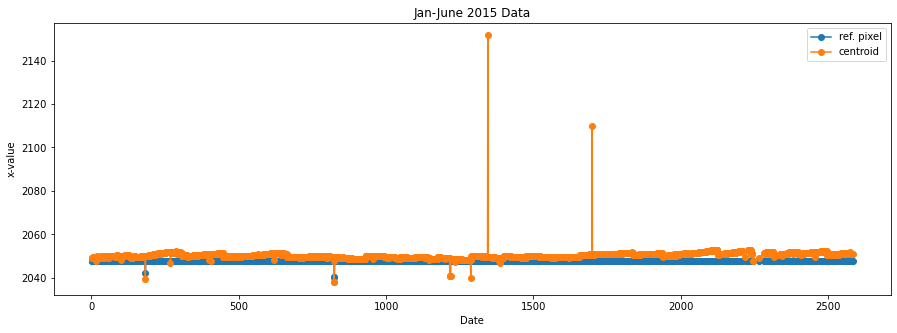

In [59]:
dates = np.arange(len(rsuns)) + 1
plt.figure(figsize=(15,5))
plt.plot(dates[xrefs_mask][:-1], xrefs[xrefs_mask][:-1],'-o', label = 'ref. pixel')
plt.plot(dates[xcens_mask][:-1], xcens[xcens_mask][:-1],'-o', label = 'centroid')
plt.legend()
plt.xlabel('Date')
plt.ylabel('x-value')
plt.title("Jan-June 2015 Data")
plt.show()

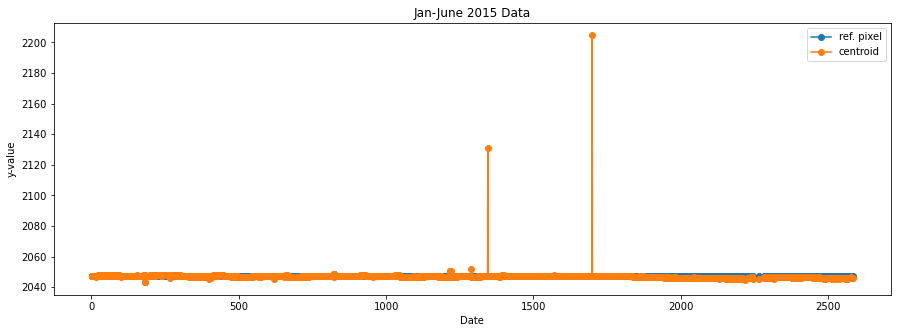

In [64]:
dates = np.arange(len(rsuns)) + 1
plt.figure(figsize=(15,5))
plt.plot(dates[yrefs_mask][:-1], yrefs[yrefs_mask][:-1],'-o', label = 'ref. pixel')
plt.plot(dates[ycens_mask][:-1], ycens[ycens_mask][:-1],'-o', label = 'centroid')
plt.legend()
plt.xlabel('Date')
plt.ylabel('y-value')
plt.title("Jan-June 2015 Data")
plt.show()

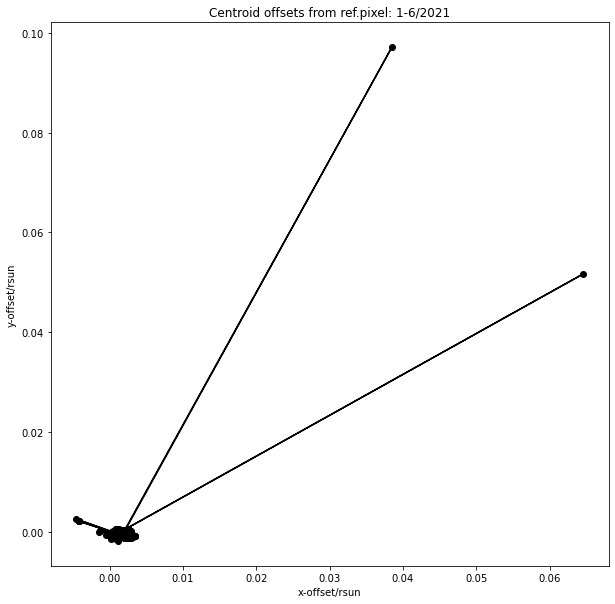

In [65]:
plt.figure(figsize = (10,10))
plt.plot(xdeltas[xdeltas_mask][:-1], ydeltas[ydeltas_mask][:-1], '-ok')
plt.title('Centroid offsets from ref.pixel: 1-6/2021')
plt.xlabel('x-offset/rsun')
plt.ylabel('y-offset/rsun')
plt.show()

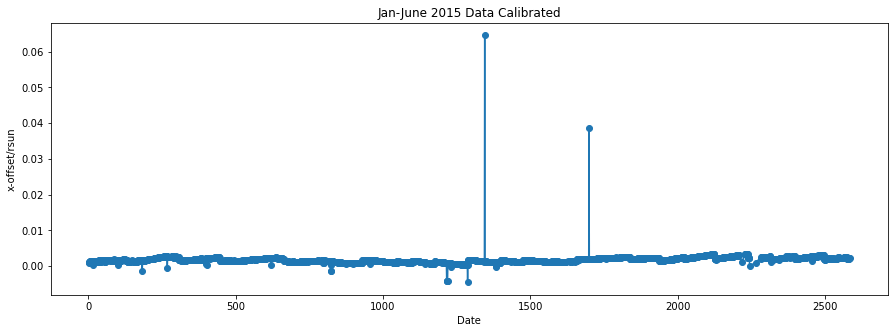

In [67]:
dates = np.arange(len(rsuns)) + 1
plt.figure(figsize=(15,5))
plt.plot(dates[xdeltas_mask], xdeltas[xdeltas_mask],'-o')
plt.xlabel('Date')
plt.ylabel('x-offset/rsun')
plt.title("Jan-June 2015 Data Calibrated")
plt.show()

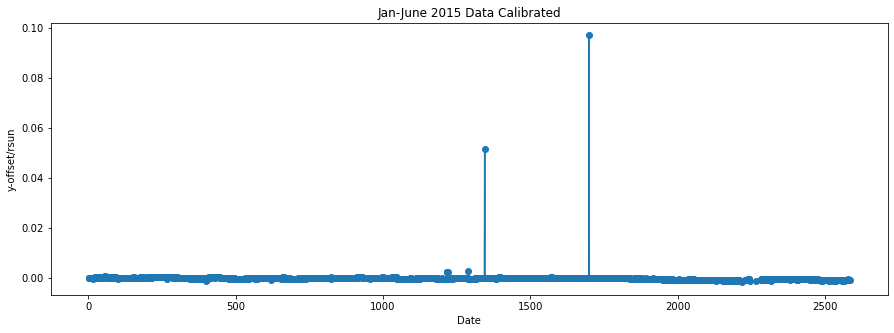

In [68]:
dates = np.arange(len(rsuns)) + 1
plt.figure(figsize=(15,5))
plt.plot(dates[ydeltas_mask], ydeltas[ydeltas_mask],'-o')
plt.xlabel('Date')
plt.ylabel('y-offset/rsun')
plt.title("Jan-June 2015 Data Calibrated")
plt.show()

<sunpy.map.sources.sdo.HMIMap object at 0x7fe2668a9d90>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 HMI FRONT2
Detector:		 HMI
Measurement:		 continuum
Wavelength:		 6173.0
Observation Date:	 2019-03-06 22:10:11
Exposure Time:		 Unknown
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.6 0.6] arcsec / pix
Reference Pixel:	 [2047.5 2047.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
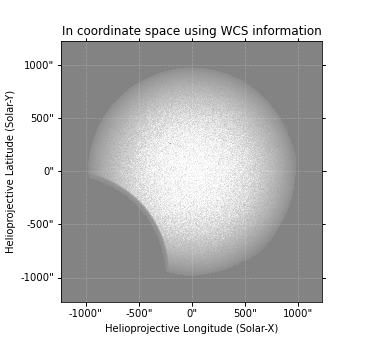
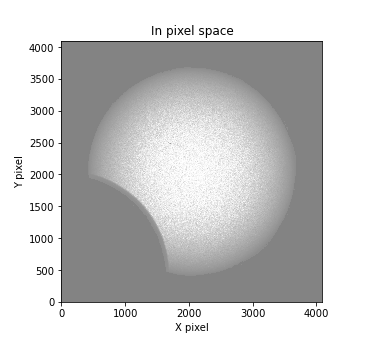
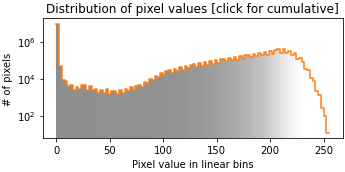
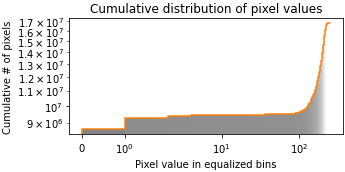

In [74]:
f = hv.download_jp2('2019-03-06T22:10:12.000', source_id = 18, progress = False)
m = Map(f)
m

In [62]:
cen(m.data)

array([2050.84143074, 2046.1580131 ])

<sunpy.map.sources.sdo.HMIMap object at 0x7fe2001411f0>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 HMI FRONT2
Detector:		 HMI
Measurement:		 continuum
Wavelength:		 6173.0
Observation Date:	 2020-02-23 23:16:55
Exposure Time:		 Unknown
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.6 0.6] arcsec / pix
Reference Pixel:	 [2047.5 2047.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
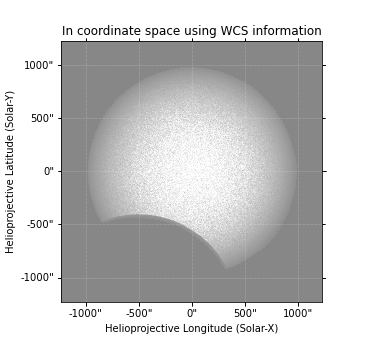
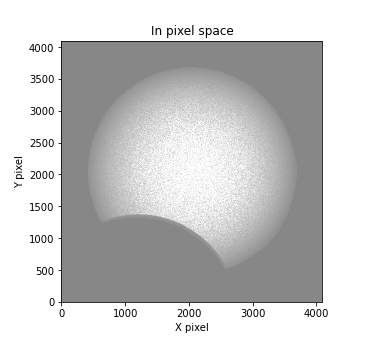
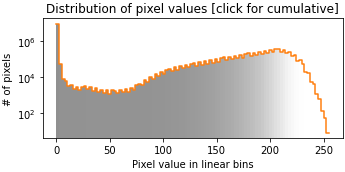
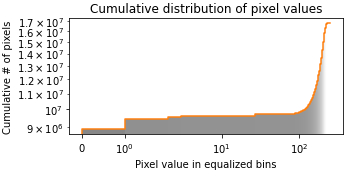

In [77]:
f2 = hv.download_jp2('2020-02-23T23:16:55.000', source_id = 18, progress = False)
m2 = Map(f2)
m2